In [1]:
# import libraries

# 1. to handle the data
import pandas as pd
import numpy as np

# 2. To Viusalize the data
import matplotlib.pyplot as plt
import seaborn as sns

# 3. To preprocess the data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer

# 4. Machine Learning
from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score

# 5. For Classification task.
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,ExtraTreesClassifier,RandomForestRegressor


# 6. Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 7. Ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Load the Dataset 

In [2]:
df = pd.read_csv('heartdisease.csv')
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,BMI,Smoker,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,MentHlth,PhysHlth,Sex,Age,Education,Income
0,0.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,1.0,0.0,18.0,15.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,25.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,28.0,0.0,0.0,0.0,1.0,0.0,0.0,30.0,30.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,27.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,24.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,0.0,11.0,5.0,4.0


### Exploratory Data Analysis (EDA)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   BMI                   253680 non-null  float64
 4   Smoker                253680 non-null  float64
 5   Diabetes              253680 non-null  float64
 6   PhysActivity          253680 non-null  float64
 7   Fruits                253680 non-null  float64
 8   Veggies               253680 non-null  float64
 9   HvyAlcoholConsump     253680 non-null  float64
 10  MentHlth              253680 non-null  float64
 11  PhysHlth              253680 non-null  float64
 12  Sex                   253680 non-null  float64
 13  Age                   253680 non-null  float64
 14  Education             253680 non-null  float64
 15  

In [4]:
df.describe()

,HeartDiseaseorAttack,HighBP,HighChol,BMI,Smoker,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,MentHlth,PhysHlth,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.094186,0.429001,0.424121,28.382364,0.443169,0.296921,0.756544,0.634256,0.811420,0.056197,3.184772,4.242081,0.440342,8.032119,5.050434,6.053875
std,0.292087,0.494934,0.494210,6.608694,0.496761,0.698160,0.429169,0.481639,0.391175,0.230302,7.412847,8.717951,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,24.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,27.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,31.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,2.000000,3.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,98.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,30.000000,30.000000,1.000000,13.000000,6.000000,8.000000


In [5]:
df.shape

(253680, 16)

In [6]:
# Checking for Null Values
df.isna().sum()

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
BMI                     0
Smoker                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
MentHlth                0
PhysHlth                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [7]:
# Finding the value count for my target column
df['HeartDiseaseorAttack'].value_counts()

HeartDiseaseorAttack
0.0    229787
1.0     23893
Name: count, dtype: int64

### Visualization

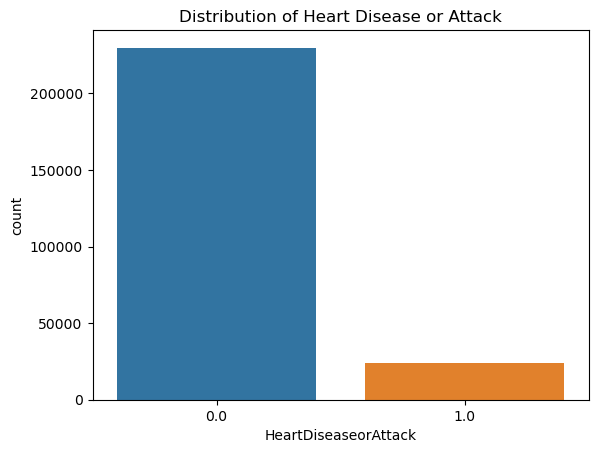

In [8]:
# target visualization
sns.countplot(data = df, x= "HeartDiseaseorAttack")
plt.title("Distribution of Heart Disease or Attack")
plt.show()

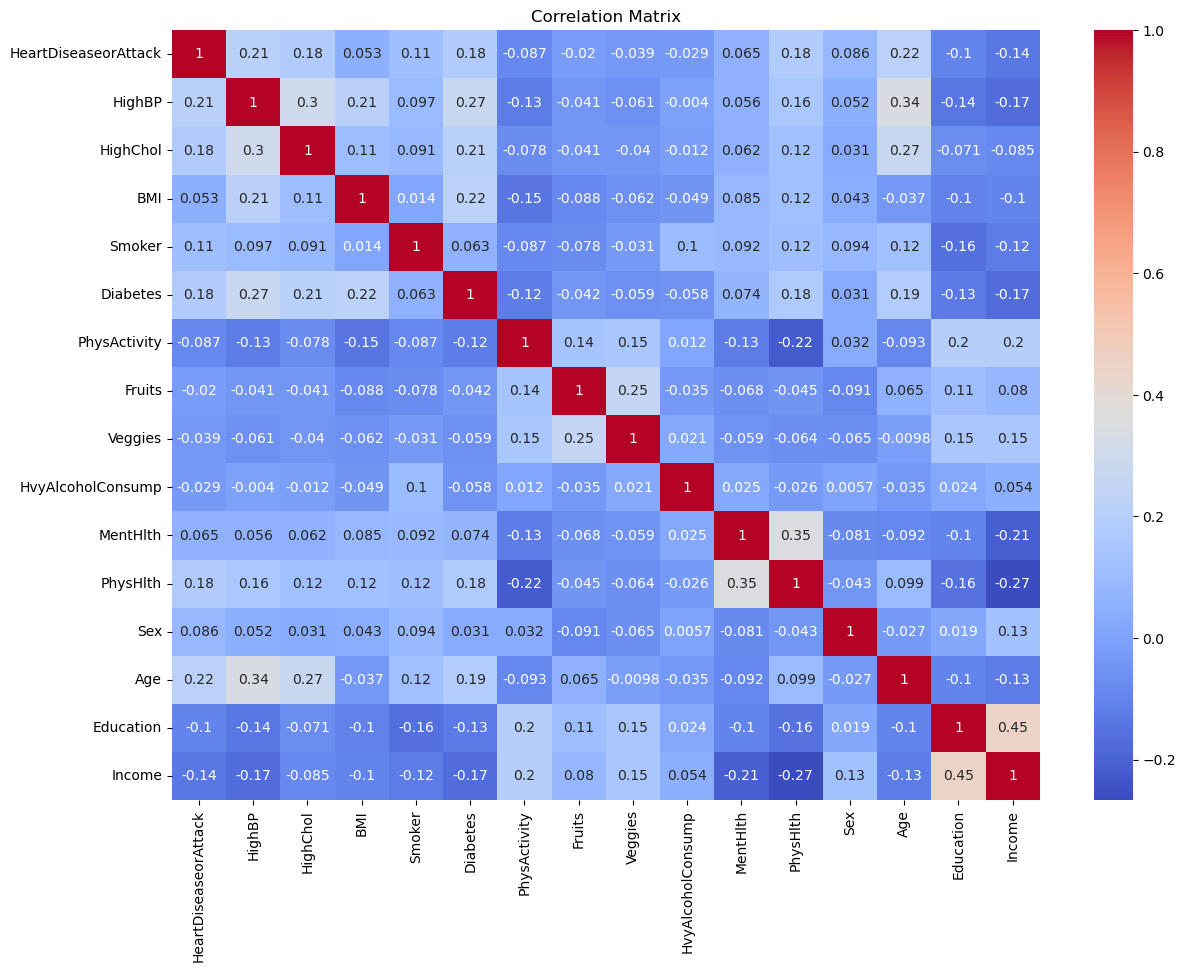

In [9]:
# Correlation matrix between features
plt.figure(figsize= (14,10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap ="coolwarm")
plt.title("Correlation Matrix")
plt.show()


In [11]:
# Dropping our target column
X = df.drop("HeartDiseaseorAttack", axis =1)
y = df["HeartDiseaseorAttack"]

In [12]:
# Our target column has been droppped
X.shape

(253680, 15)

### Model Building


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [14]:
# feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'KNN': KNeighborsClassifier(), 
    'Naive Bayes': GaussianNB(), 
}

accuracies={} # Dictionary to store accuracies
for name, model in models.items():
    print(f"\n\nTraining {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred).round(2)
    accuracies[name] = accuracy # Stored under the model's name
    print(f"{name} Accuracy: {accuracy}")
    print(classification_report(y_test, y_pred))

# Convert the accuracies dictionary to a DataFrame
accuracies_df = pd.DataFrame(list(accuracies.items()), columns=['Model', 'Accuracy'])



Training Logistic Regression...
Logistic Regression Accuracy: 0.91
              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95     75872
         1.0       0.50      0.07      0.12      7843

    accuracy                           0.91     83715
   macro avg       0.70      0.53      0.53     83715
weighted avg       0.87      0.91      0.87     83715



Training Decision Tree...
Decision Tree Accuracy: 0.85
              precision    recall  f1-score   support

         0.0       0.92      0.91      0.92     75872
         1.0       0.22      0.24      0.23      7843

    accuracy                           0.85     83715
   macro avg       0.57      0.58      0.57     83715
weighted avg       0.85      0.85      0.85     83715



Training Random Forest...
Random Forest Accuracy: 0.9
              precision    recall  f1-score   support

         0.0       0.91      0.98      0.95     75872
         1.0       0.31      0.08      0.12      7843



In [21]:
import plotly.express as px

### Model comparison

In [24]:
# Create a horizontal bar plot for accuracies
px.bar(accuracies_df.sort_values('Accuracy'),x='Accuracy',y='Model', orientation='h',title='Accuracy of Different Models')

# Conclusion
### The best performing model in this dataset is LOGISTICS REGRESSION with 91% accuracy.